# CWRU Bearing Data - Data Preprocessing

In [19]:
import os
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Example

In [20]:
for root, dirs, files in os.walk('.\\Data\\NormalBaselineData', topdown=False):
    for name in files:
        path = os.path.join(root, name)
        print(path)

.\Data\NormalBaselineData\Normal_0.mat
.\Data\NormalBaselineData\Normal_1.mat
.\Data\NormalBaselineData\Normal_2.mat
.\Data\NormalBaselineData\Normal_3.mat


In [21]:
path = r'.\\Data\\NormalBaselineData\\Normal_3.mat'
mat = scipy.io.loadmat(path)

print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X100_DE_time', 'X100_FE_time', 'X100RPM'])


In [22]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 11:25:48 2000'), ('__version__', '1.0'), ('__globals__', []), ('X100_DE_time', array([[ 0.01460308],
       [ 0.05444862],
       [ 0.10764554],
       ...,
       [-0.02357354],
       [ 0.00521538],
       [ 0.04777292]])), ('X100_FE_time', array([[ 0.19292182],
       [ 0.16436364],
       [ 0.09081091],
       ...,
       [ 0.10930182],
       [ 0.05218545],
       [-0.00452   ]])), ('X100RPM', array([[1725]], dtype=uint16))])

In [23]:
key_name = list(mat.keys())[3]
print(key_name)

X100_DE_time


In [24]:
DE_data = mat[key_name]
print(DE_data.shape)

(485643, 1)


In [25]:
fault = np.full((len(DE_data), 1), name[:-4])
print(fault.shape)

(485643, 1)


In [26]:
df_temp = pd.DataFrame({'DE_data': np.ravel(DE_data), 'fault': np.ravel(fault)})
print(df_temp.shape)

(485643, 2)


In [27]:
df_temp.head()

,DE_data,fault
0,0.014603,Normal_3
1,0.054449,Normal_3
2,0.107646,Normal_3
3,0.133722,Normal_3
4,0.112652,Normal_3


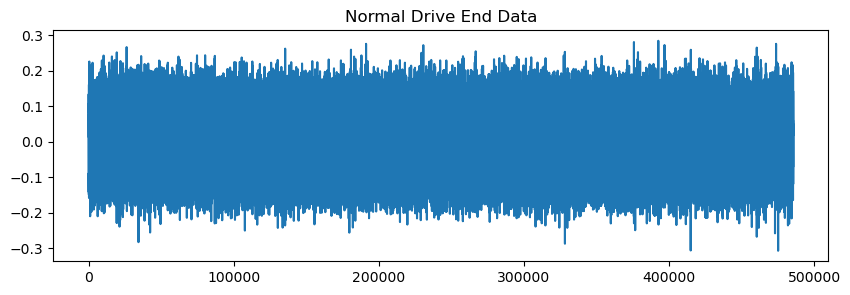

In [28]:
plt.figure(figsize=(10, 3))
plt.plot(df_temp['DE_data'], label=name[:-4])
plt.title('Normal Drive End Data')
plt.show()

## Normal Baseline Data

In [29]:
df_normal = pd.DataFrame(columns = ['DE_data', 'fault'])

for root, dirs, files in os.walk('.\\Data\\NormalBaselineData', topdown=False):
    for name in files:
        path = os.path.join(root, name)
        print(path)
        mat = scipy.io.loadmat(path)
        key_name = list(mat.keys())[3]
        DE_data = mat[key_name]
        fault = np.full((len(DE_data), 1), name[:-4])
        df_temp = pd.DataFrame({'DE_data': np.ravel(DE_data), 'fault': np.ravel(fault)})
        df_normal = pd.concat([df_normal, df_temp], axis=0)
        print(df_normal['fault'].unique())

.\Data\NormalBaselineData\Normal_0.mat
['Normal_0']
.\Data\NormalBaselineData\Normal_1.mat
['Normal_0' 'Normal_1']
.\Data\NormalBaselineData\Normal_2.mat
['Normal_0' 'Normal_1' 'Normal_2']
.\Data\NormalBaselineData\Normal_3.mat
['Normal_0' 'Normal_1' 'Normal_2' 'Normal_3']


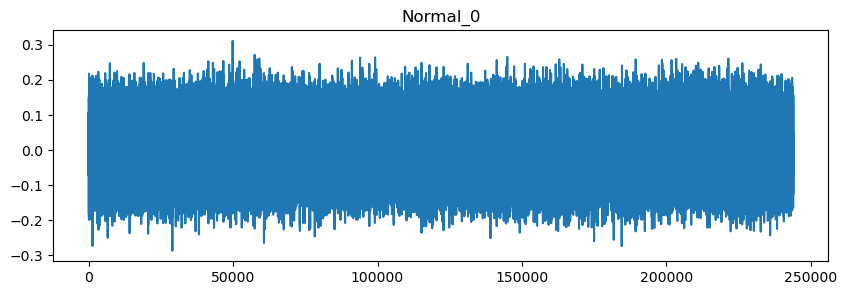

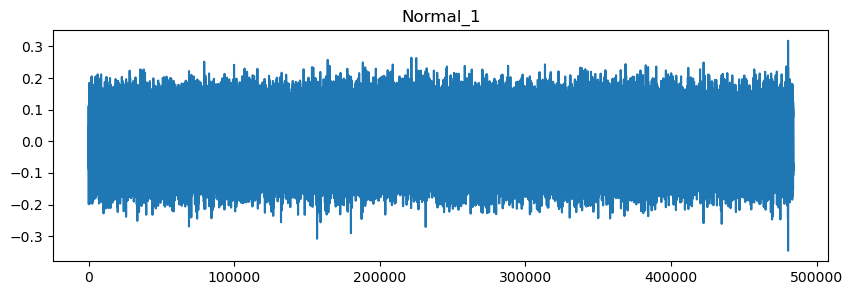

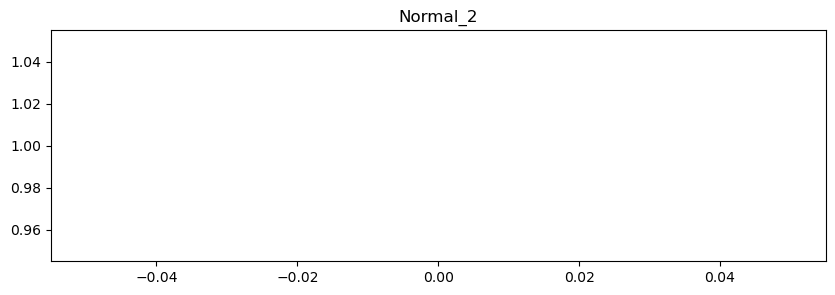

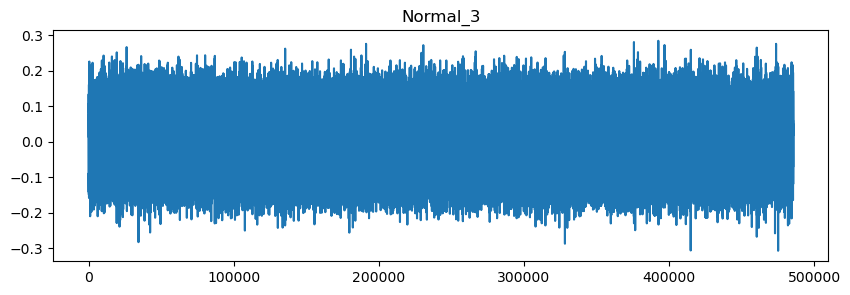

In [30]:
normals = df_normal['fault'].unique()
for n in normals:
    plt.figure(figsize=(10, 3))
    plt.plot(df_normal[df_normal['fault'] == n]['DE_data'])
    plt.title(n)
    plt.show()

In [31]:
df_normal[df_normal['fault'] == 'Normal_2']

,DE_data,fault
0,1.0,Normal_2


Jak widać w pliku `Normal_2` brakuje danych do analizowania.

## 12k Drive End Bearing Data

### Ball

In [41]:
df_12k_drive_ball = pd.DataFrame(columns = ['DE_data', 'fault'])

for root, dirs, files in os.walk('.\\Data\\12kDriveEndBearingFaultData\\Ball', topdown=False):
    for name in files:
        path = os.path.join(root, name)
        print(path)
        if os.path.exists(path):
            print("Plik istnieje:", path)
            mat = scipy.io.loadmat(path, verify_compressed_data_integrity=False)
        else:
            print("Plik nie istnieje:", path)
            continue
        key_name = list(mat.keys())[3]
        DE_data = mat[key_name]
        fault = np.full((len(DE_data), 1), name[:-4])
        df_temp = pd.DataFrame({'DE_data': np.ravel(DE_data), 'fault': np.ravel(fault)})
        df_12k_drive_ball = pd.concat([df_12k_drive_ball, df_temp], axis=0)
        print(df_12k_drive_ball['fault'].unique())

.\Data\12kDriveEndBearingFaultData\Ball\B007_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\Ball\B007_0.mat
['B007_0']
.\Data\12kDriveEndBearingFaultData\Ball\B007_1.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\Ball\B007_1.mat
['B007_0' 'B007_1']
.\Data\12kDriveEndBearingFaultData\Ball\B007_2.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\Ball\B007_2.mat
['B007_0' 'B007_1' 'B007_2']
.\Data\12kDriveEndBearingFaultData\Ball\B007_3.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\Ball\B007_3.mat
['B007_0' 'B007_1' 'B007_2' 'B007_3']
.\Data\12kDriveEndBearingFaultData\Ball\B014_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\Ball\B014_0.mat
['B007_0' 'B007_1' 'B007_2' 'B007_3' 'B014_0']
.\Data\12kDriveEndBearingFaultData\Ball\B014_1.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\Ball\B014_1.mat
['B007_0' 'B007_1' 'B007_2' 'B007_3' 'B014_0' 'B014_1']
.\Data\12kDriveEndBearingFaultData\Ball\B014_2.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultD

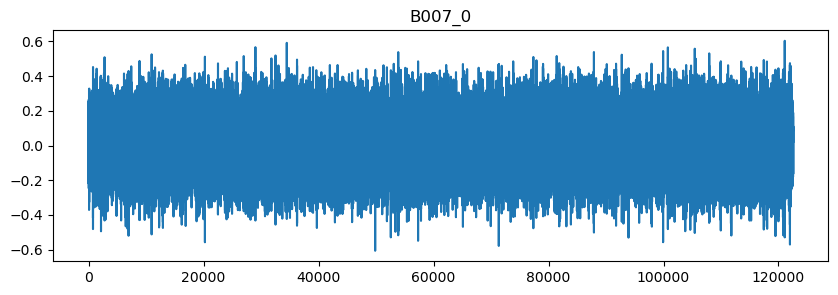

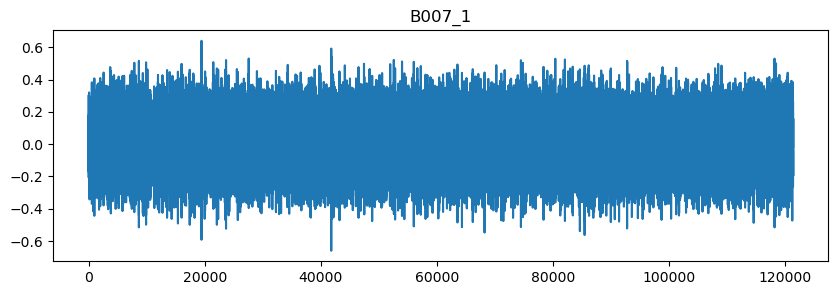

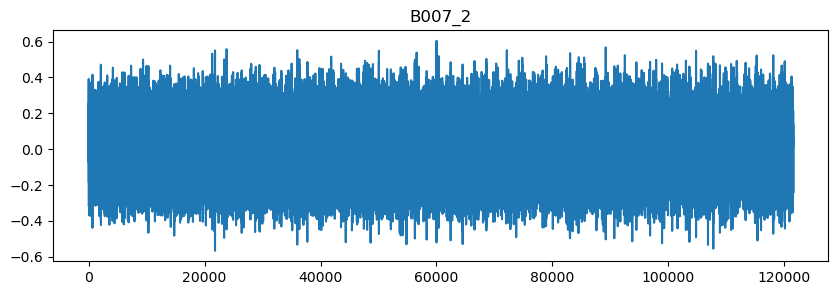

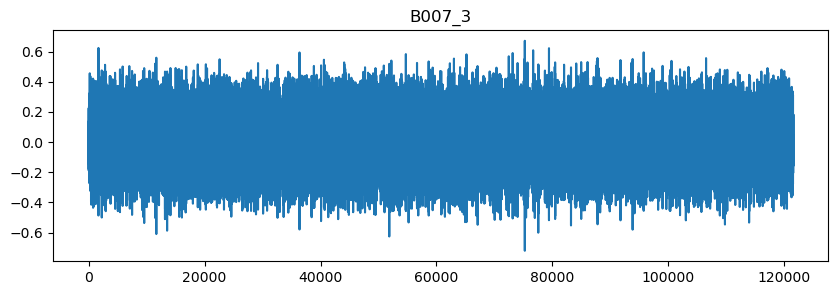

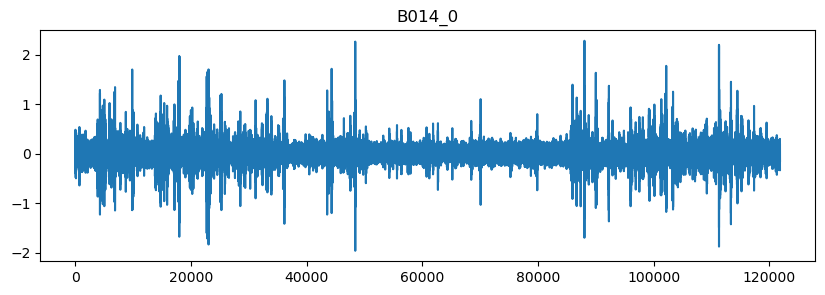

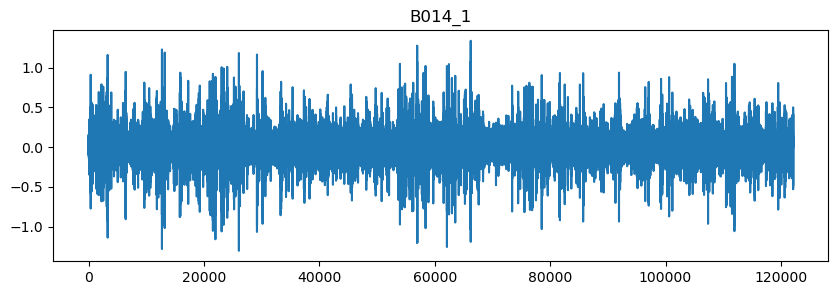

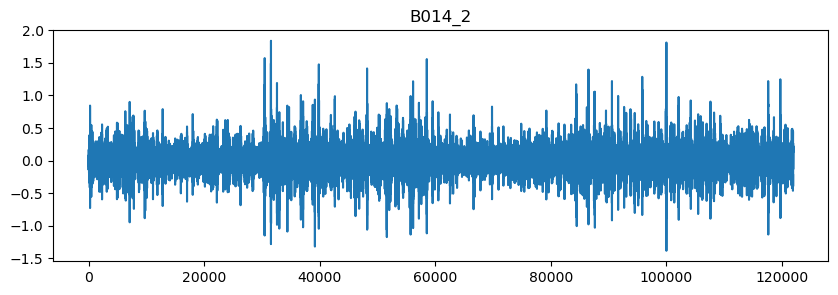

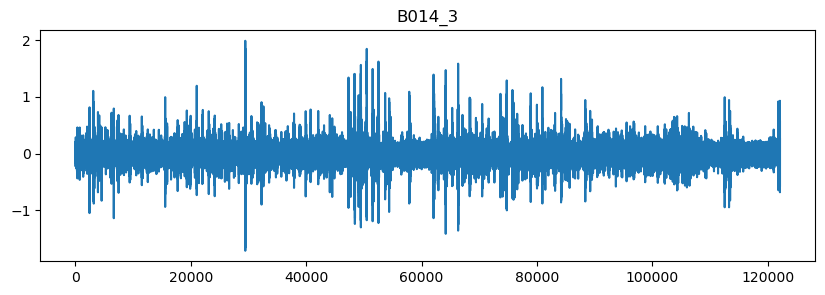

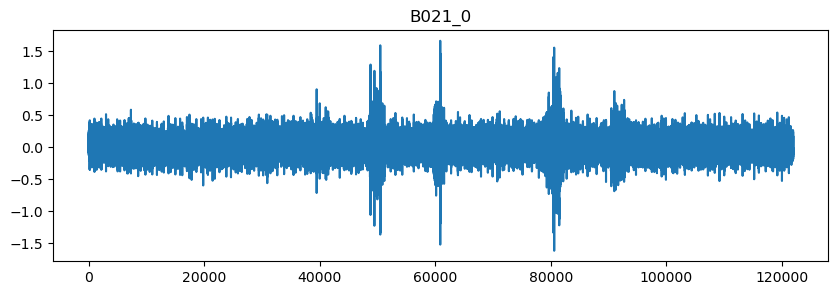

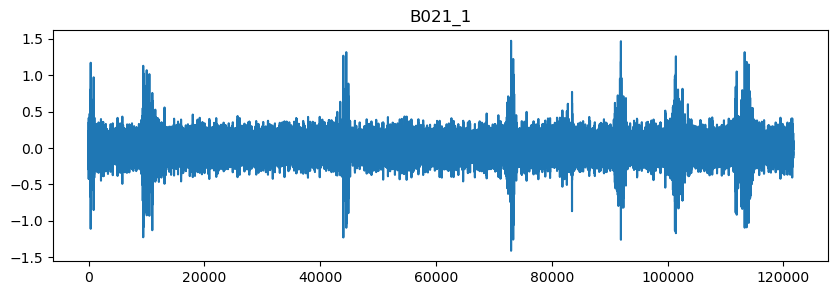

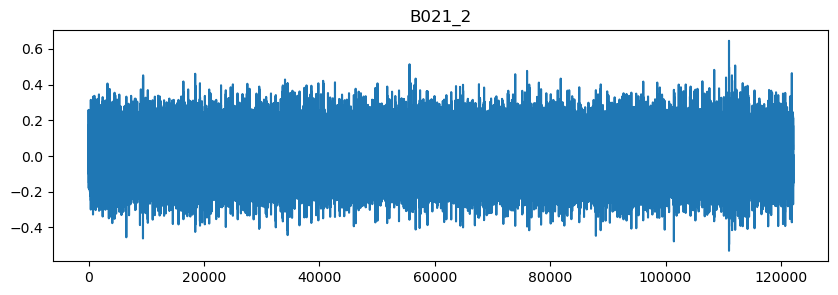

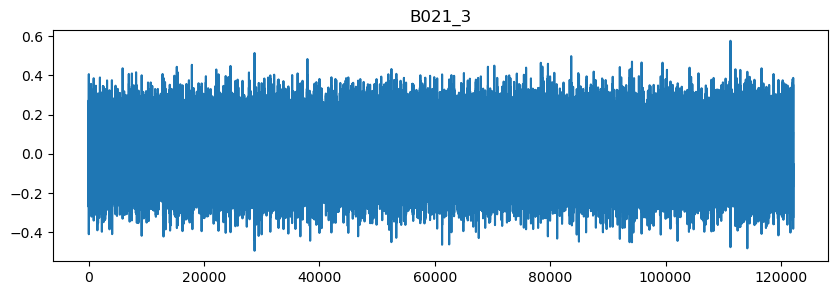

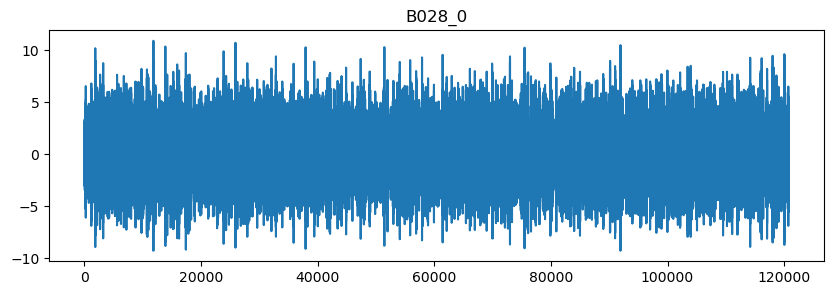

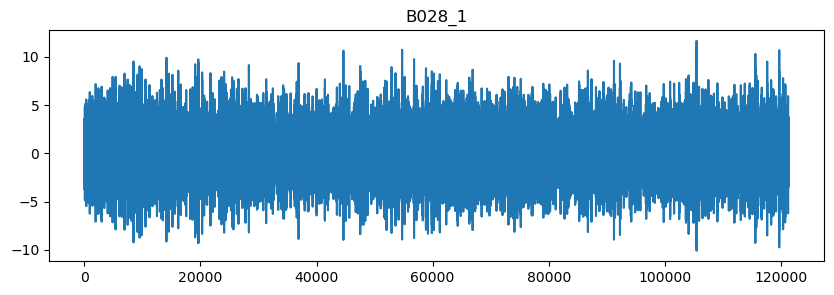

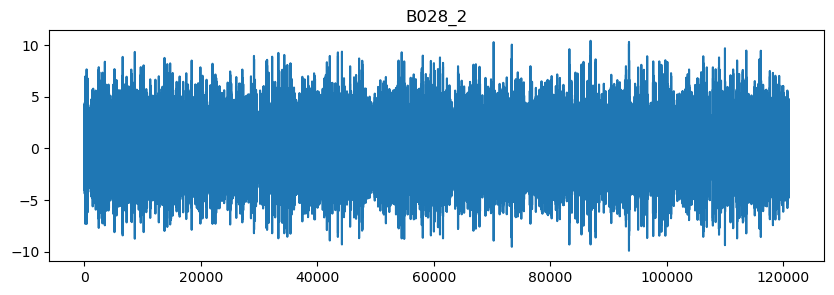

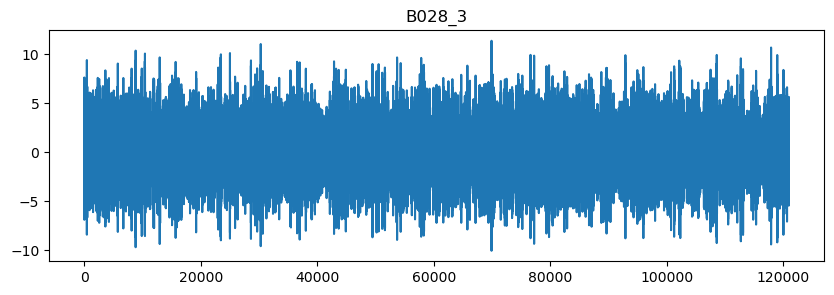

In [42]:
faults = df_12k_drive_ball['fault'].unique()
for f in faults:
    plt.figure(figsize=(10, 3))
    plt.plot(df_12k_drive_ball[df_12k_drive_ball['fault'] == f]['DE_data'])
    plt.title(f)
    plt.show()

### Inner Race

In [43]:
df_12k_drive_inner_race = pd.DataFrame(columns = ['DE_data', 'fault'])

for root, dirs, files in os.walk('.\\Data\\12kDriveEndBearingFaultData\\InnerRace', topdown=False):
    for name in files:
        path = os.path.join(root, name)
        print(path)
        if os.path.exists(path):
            print("Plik istnieje:", path)
            mat = scipy.io.loadmat(path)
        else:
            print("Plik nie istnieje:", path)
            continue
        key_name = list(mat.keys())[3]
        DE_data = mat[key_name]
        fault = np.full((len(DE_data), 1), name[:-4])
        df_temp = pd.DataFrame({'DE_data': np.ravel(DE_data), 'fault': np.ravel(fault)})
        df_12k_drive_inner_race = pd.concat([df_12k_drive_inner_race, df_temp], axis=0)
        print(df_12k_drive_inner_race['fault'].unique())

.\Data\12kDriveEndBearingFaultData\InnerRace\IR007_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\InnerRace\IR007_0.mat
['IR007_0']
.\Data\12kDriveEndBearingFaultData\InnerRace\IR007_1.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\InnerRace\IR007_1.mat
['IR007_0' 'IR007_1']
.\Data\12kDriveEndBearingFaultData\InnerRace\IR007_2.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\InnerRace\IR007_2.mat
['IR007_0' 'IR007_1' 'IR007_2']
.\Data\12kDriveEndBearingFaultData\InnerRace\IR007_3.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\InnerRace\IR007_3.mat
['IR007_0' 'IR007_1' 'IR007_2' 'IR007_3']
.\Data\12kDriveEndBearingFaultData\InnerRace\IR014_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\InnerRace\IR014_0.mat
['IR007_0' 'IR007_1' 'IR007_2' 'IR007_3' 'IR014_0']
.\Data\12kDriveEndBearingFaultData\InnerRace\IR014_1.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\InnerRace\IR014_1.mat
['IR007_0' 'IR007_1' 'IR007_2' 'IR007_3' 'IR014_0' 'IR014_1']
.\Da

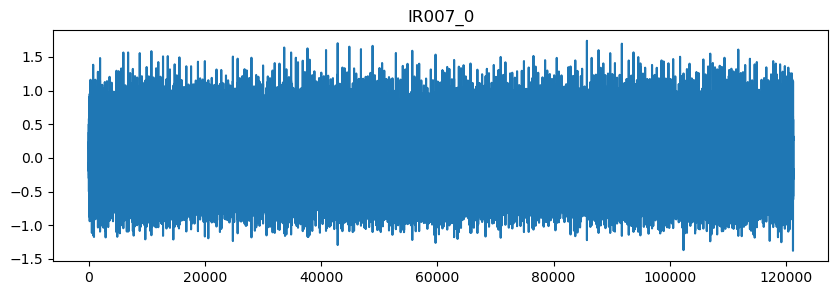

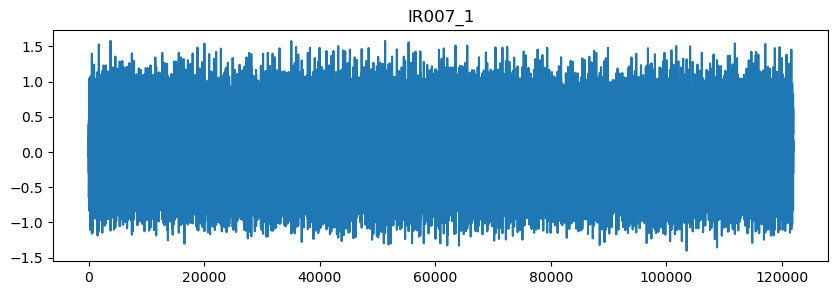

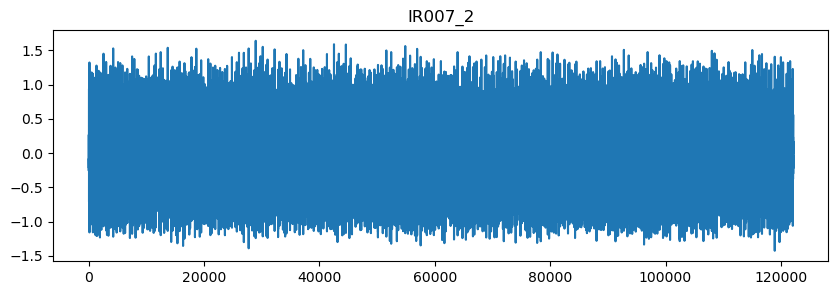

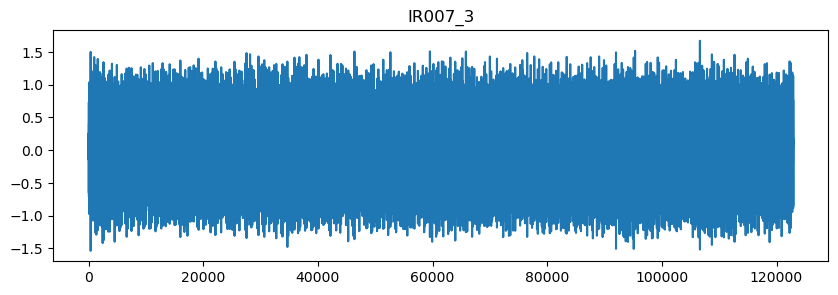

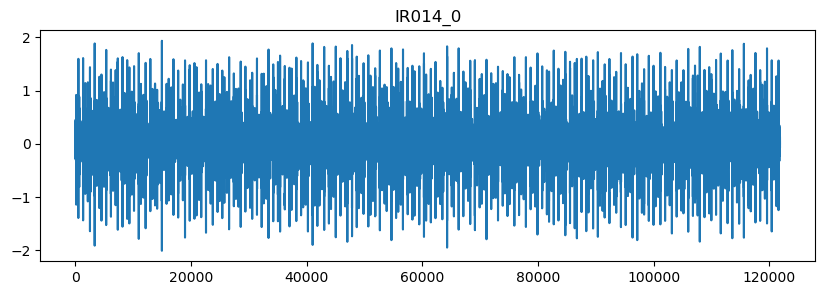

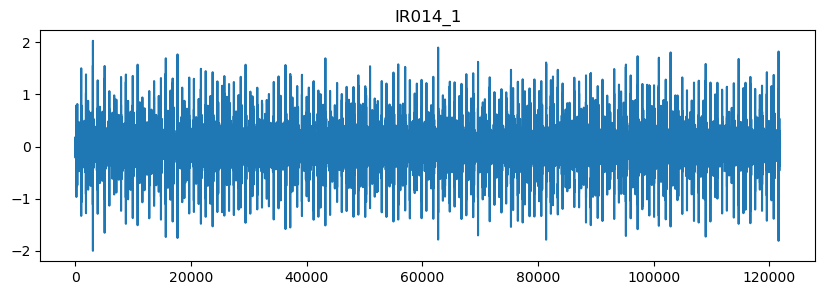

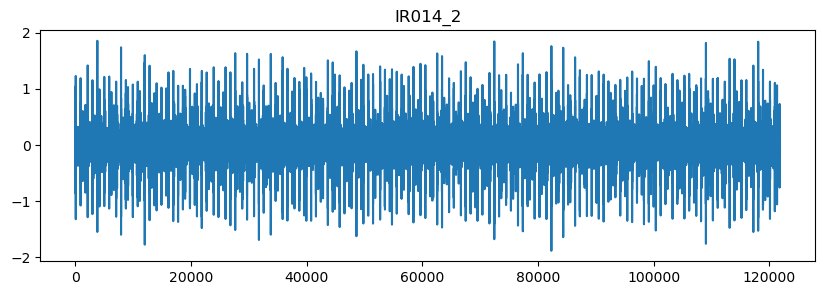

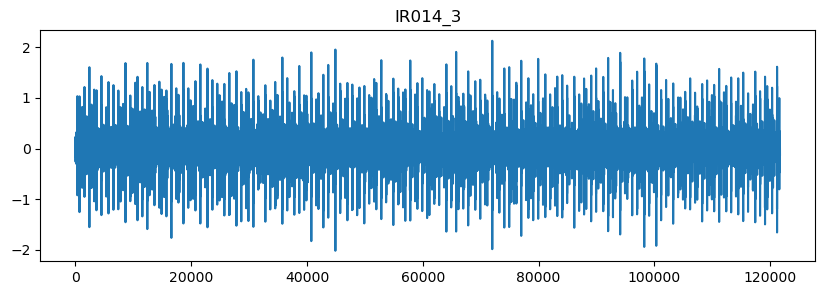

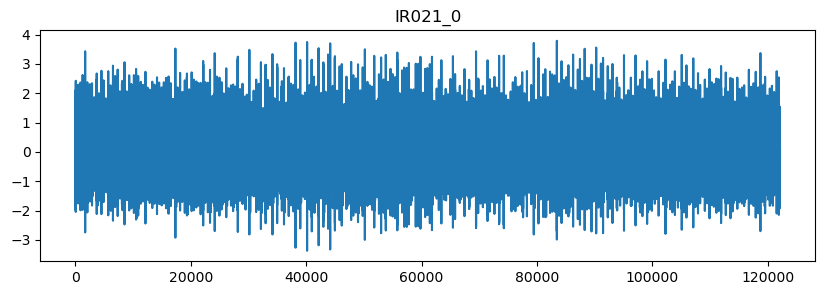

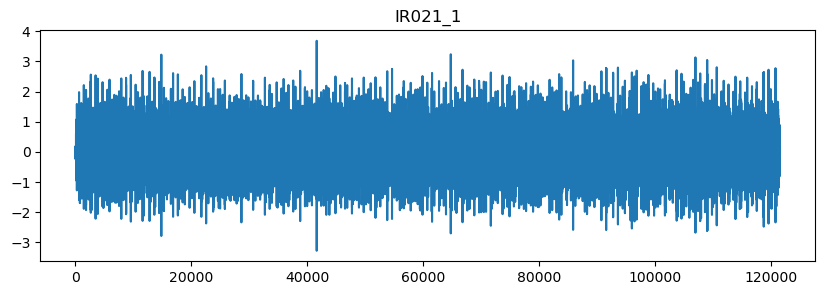

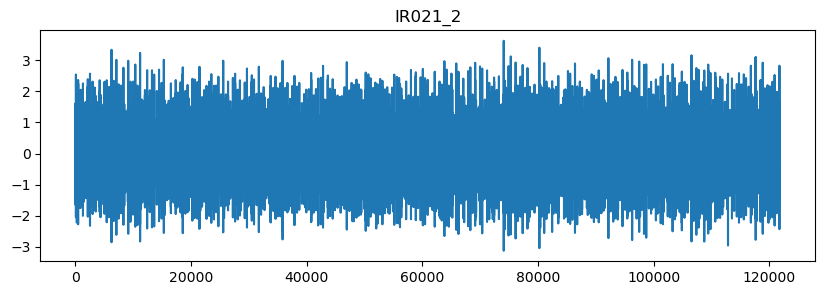

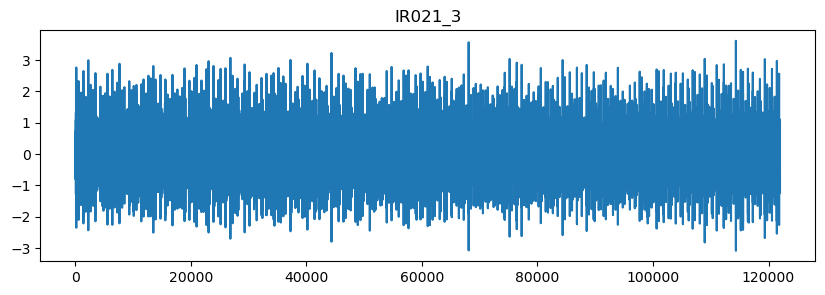

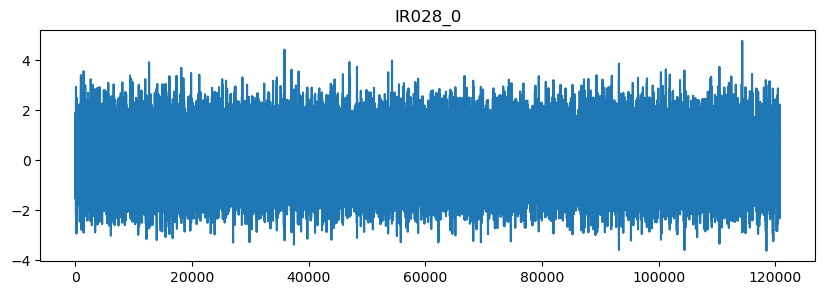

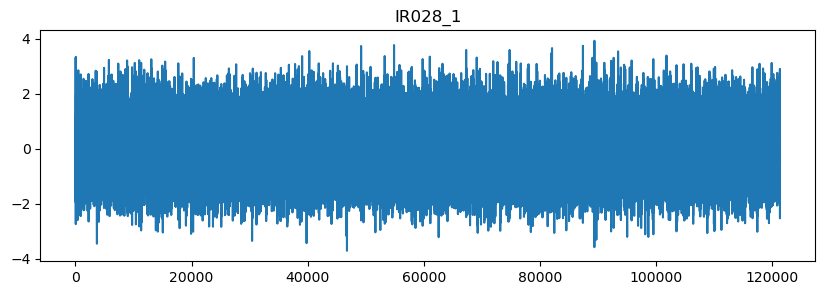

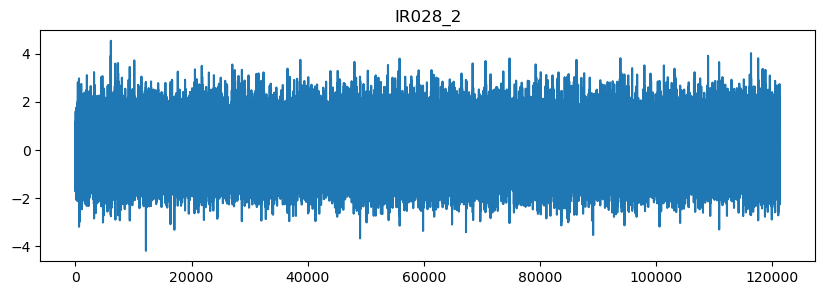

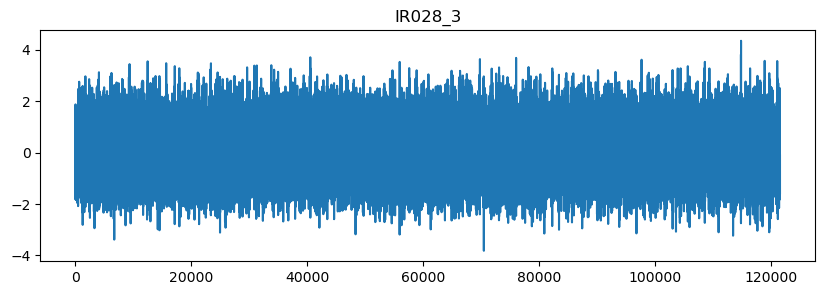

In [44]:
faults = df_12k_drive_inner_race['fault'].unique()
for f in faults:
    plt.figure(figsize=(10, 3))
    plt.plot(df_12k_drive_inner_race[df_12k_drive_inner_race['fault'] == f]['DE_data'])
    plt.title(f)
    plt.show()

### Outer Race Centered @6.00

In [45]:
df_12k_drive_outer_race_centered_600 = pd.DataFrame(columns = ['DE_data', 'fault'])

for root, dirs, files in os.walk('.\\Data\\12kDriveEndBearingFaultData\\OuterRaceCentered@6.00', topdown=False):
    for name in files:
        path = os.path.join(root, name)
        print(path)
        if os.path.exists(path):
            print("Plik istnieje:", path)
            mat = scipy.io.loadmat(path)
        else:
            print("Plik nie istnieje:", path)
            continue
        key_name = list(mat.keys())[3]
        DE_data = mat[key_name]
        fault = np.full((len(DE_data), 1), name[:-4])
        df_temp = pd.DataFrame({'DE_data': np.ravel(DE_data), 'fault': np.ravel(fault)})
        df_12k_drive_outer_race_centered_600 = pd.concat([df_12k_drive_outer_race_centered_600, df_temp], axis=0)
        print(df_12k_drive_outer_race_centered_600['fault'].unique())

.\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR007@6_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR007@6_0.mat
['OR007@6_0']
.\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR007@6_1.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR007@6_1.mat
['OR007@6_0' 'OR007@6_1']
.\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR007@6_2.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR007@6_2.mat
['OR007@6_0' 'OR007@6_1' 'OR007@6_2']
.\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR007@6_3.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR007@6_3.mat
['OR007@6_0' 'OR007@6_1' 'OR007@6_2' 'OR007@6_3']
.\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR014@6_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceCentered@6.00\OR014@6_0.mat
['OR007@6_0' 'OR007@6_1' 'OR007@6_2' 'OR007@6_3' 'OR014@6_0']
.\Data\12kDrive

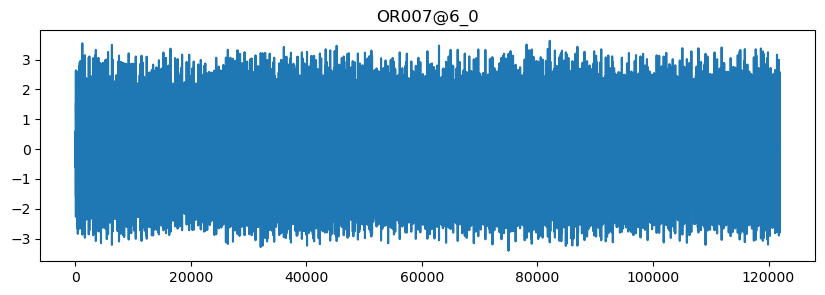

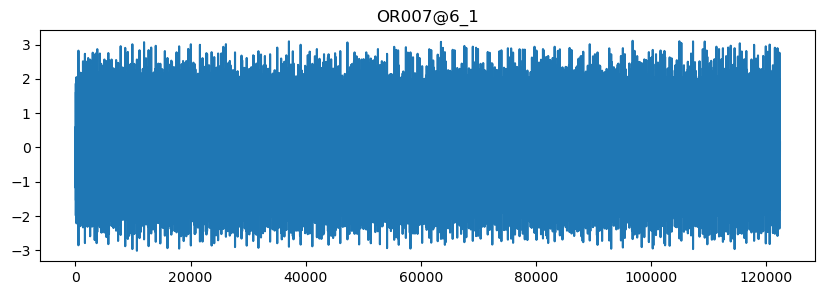

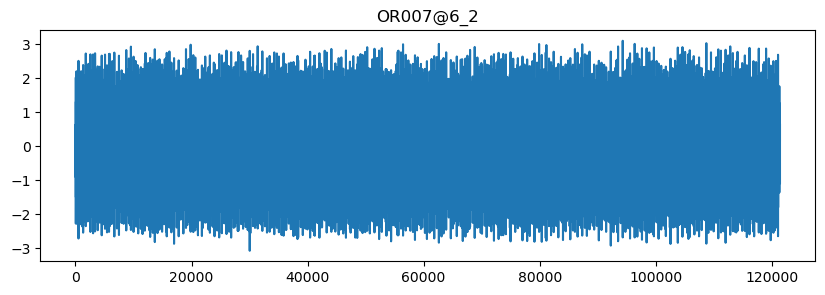

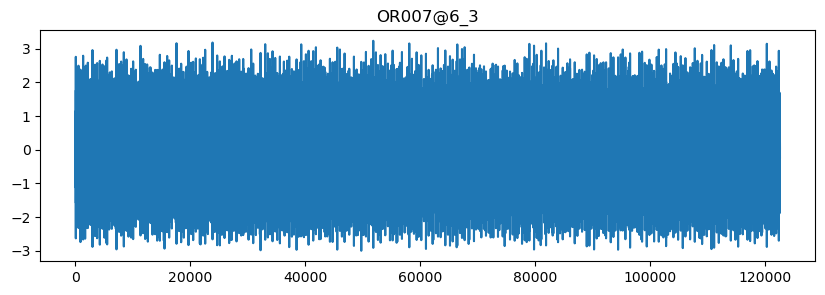

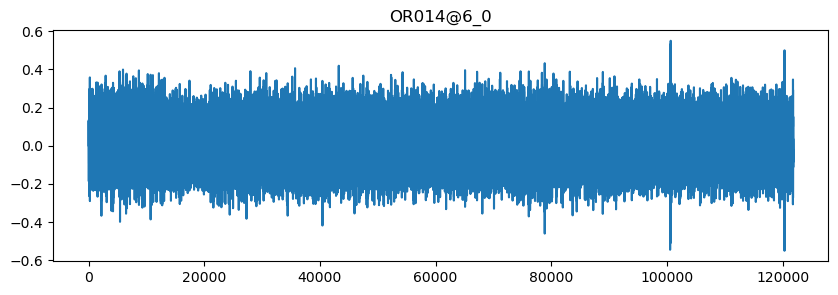

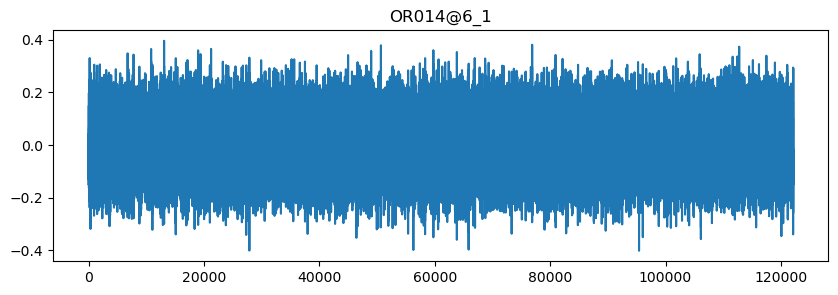

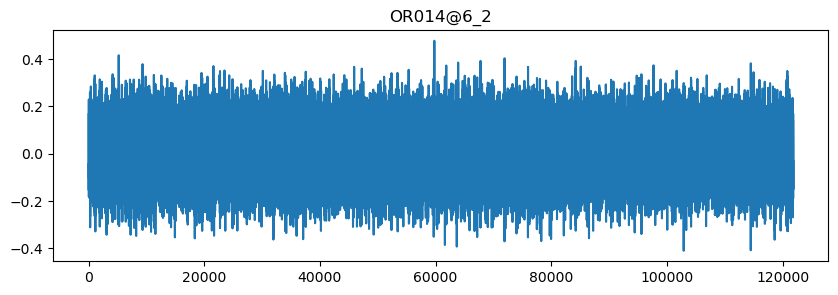

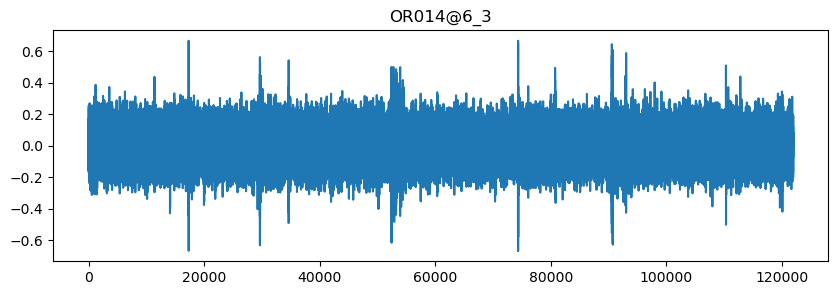

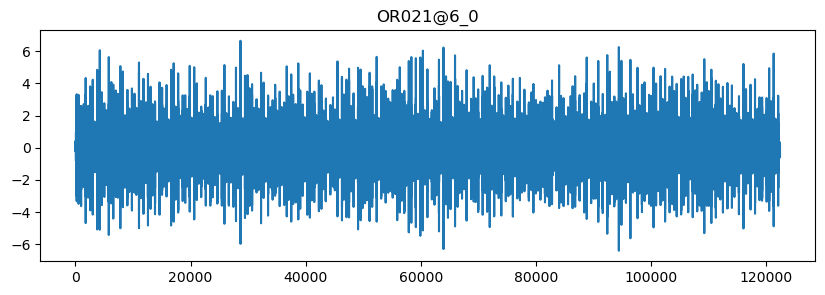

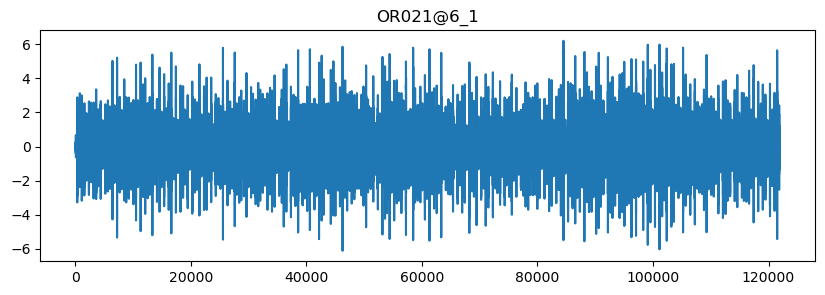

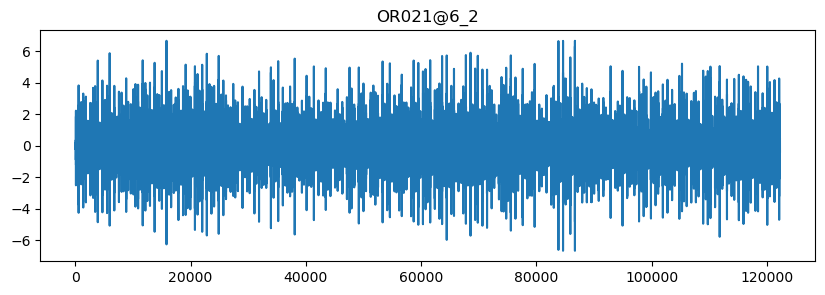

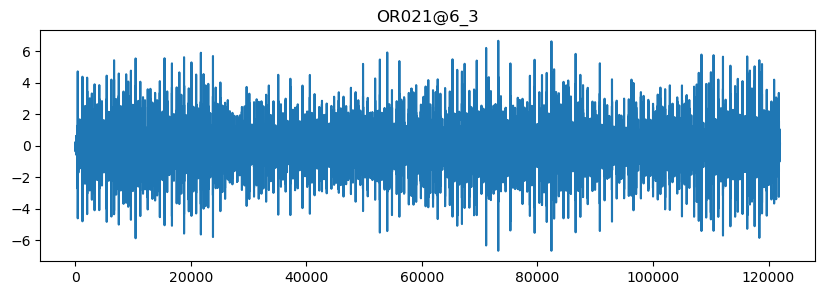

In [46]:
faults = df_12k_drive_outer_race_centered_600['fault'].unique()
for f in faults:
    plt.figure(figsize=(10, 3))
    plt.plot(df_12k_drive_outer_race_centered_600[df_12k_drive_outer_race_centered_600['fault'] == f]['DE_data'])
    plt.title(f)
    plt.show()

### Outer Race Opposite @12.00

In [47]:
df_12k_drive_outer_race_opposite_1200 = pd.DataFrame(columns = ['DE_data', 'fault'])

for root, dirs, files in os.walk('.\\Data\\12kDriveEndBearingFaultData\\OuterRaceOpposite@12.00', topdown=False):
    for name in files:
        path = os.path.join(root, name)
        print(path)
        if os.path.exists(path):
            print("Plik istnieje:", path)
            mat = scipy.io.loadmat(path)
        else:
            print("Plik nie istnieje:", path)
            continue
        key_name = list(mat.keys())[3]
        DE_data = mat[key_name]
        fault = np.full((len(DE_data), 1), name[:-4])
        df_temp = pd.DataFrame({'DE_data': np.ravel(DE_data), 'fault': np.ravel(fault)})
        df_12k_drive_outer_race_opposite_1200 = pd.concat([df_12k_drive_outer_race_opposite_1200, df_temp], axis=0)
        print(df_12k_drive_outer_race_opposite_1200['fault'].unique())

.\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR007@12_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR007@12_0.mat
['OR007@12_0']
.\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR007@12_1.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR007@12_1.mat
['OR007@12_0' 'OR007@12_1']
.\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR007@12_2.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR007@12_2.mat
['OR007@12_0' 'OR007@12_1' 'OR007@12_2']
.\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR007@12_3.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR007@12_3.mat
['OR007@12_0' 'OR007@12_1' 'OR007@12_2' 'OR007@12_3']
.\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR021@12_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOpposite@12.00\OR021@12_0.mat
['OR007@12_0' 'OR007@12_1' 'OR007@12_2' 'OR007@

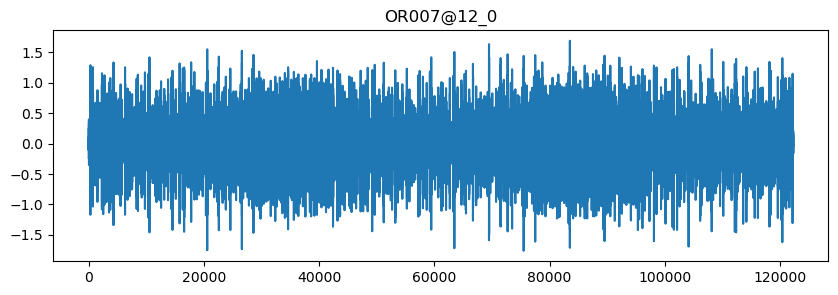

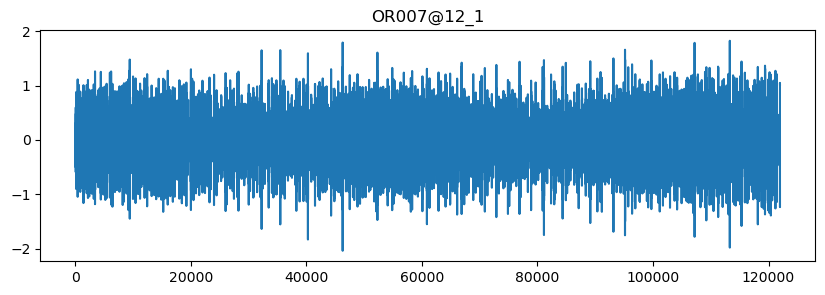

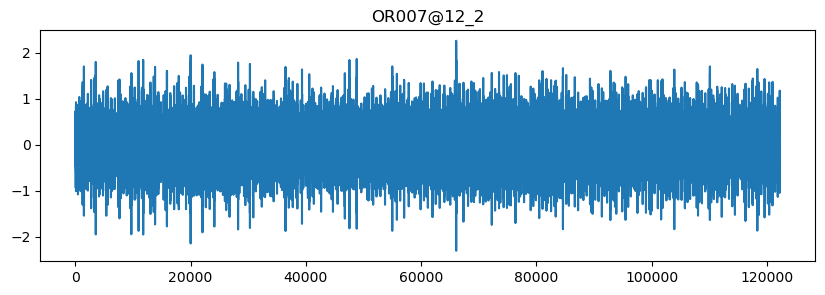

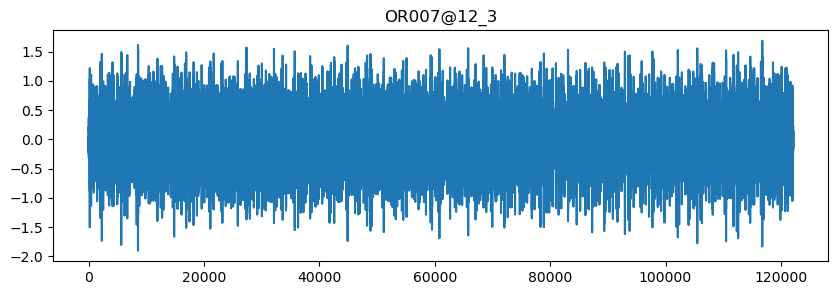

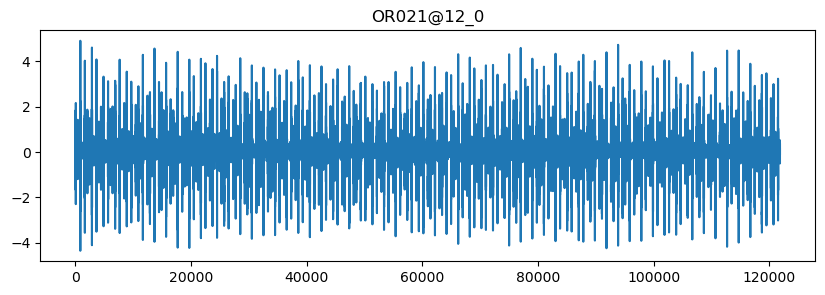

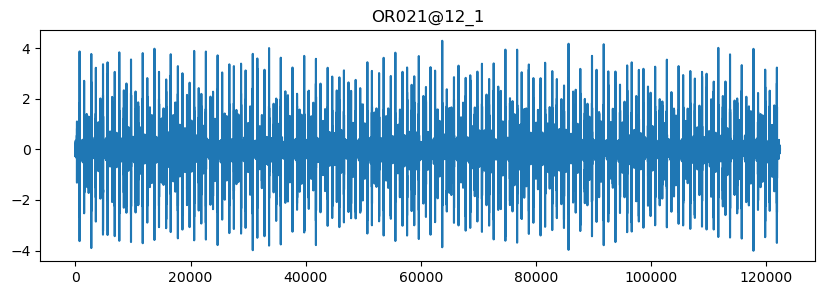

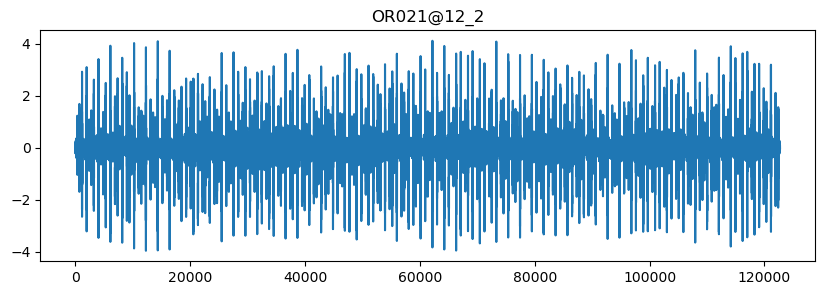

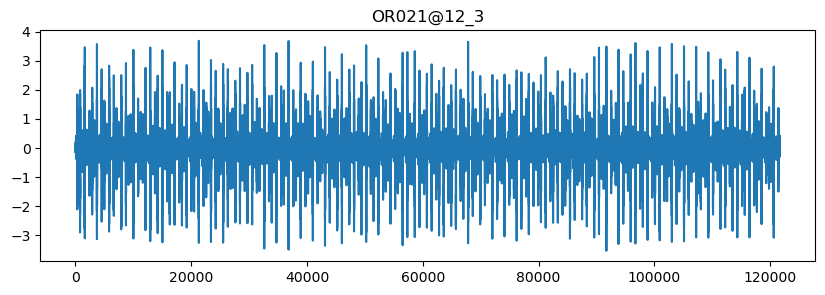

In [48]:
faults = df_12k_drive_outer_race_opposite_1200['fault'].unique()
for f in faults:
    plt.figure(figsize=(10, 3))
    plt.plot(df_12k_drive_outer_race_opposite_1200[df_12k_drive_outer_race_opposite_1200['fault'] == f]['DE_data'])
    plt.title(f)
    plt.show()

### Outer Race Orthogonal @3.00

In [49]:
df_12k_drive_outer_race_orthogonal_300 = pd.DataFrame(columns = ['DE_data', 'fault'])

for root, dirs, files in os.walk('.\\Data\\12kDriveEndBearingFaultData\\OuterRaceOrthogonal@3.00', topdown=False):
    for name in files:
        path = os.path.join(root, name)
        print(path)
        if os.path.exists(path):
            print("Plik istnieje:", path)
            mat = scipy.io.loadmat(path)
        else:
            print("Plik nie istnieje:", path)
            continue
        key_name = list(mat.keys())[3]
        DE_data = mat[key_name]
        fault = np.full((len(DE_data), 1), name[:-4])
        df_temp = pd.DataFrame({'DE_data': np.ravel(DE_data), 'fault': np.ravel(fault)})
        df_12k_drive_outer_race_orthogonal_300 = pd.concat([df_12k_drive_outer_race_orthogonal_300, df_temp], axis=0)
        print(df_12k_drive_outer_race_orthogonal_300['fault'].unique())

.\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR007@3_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR007@3_0.mat
['OR007@3_0']
.\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR007@3_1.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR007@3_1.mat
['OR007@3_0' 'OR007@3_1']
.\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR007@3_2.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR007@3_2.mat
['OR007@3_0' 'OR007@3_1' 'OR007@3_2']
.\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR007@3_3.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR007@3_3.mat
['OR007@3_0' 'OR007@3_1' 'OR007@3_2' 'OR007@3_3']
.\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR021@3_0.mat
Plik istnieje: .\Data\12kDriveEndBearingFaultData\OuterRaceOrthogonal@3.00\OR021@3_0.mat
['OR007@3_0' 'OR007@3_1' 'OR007@3_2' 'OR007@3_3' 'OR021@3

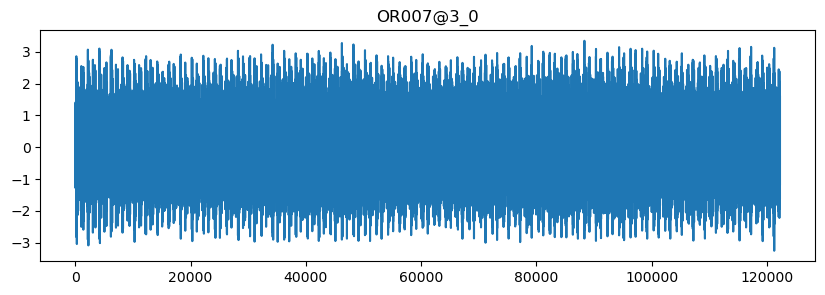

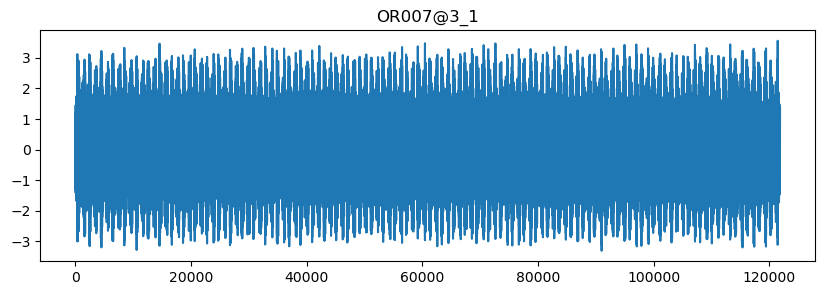

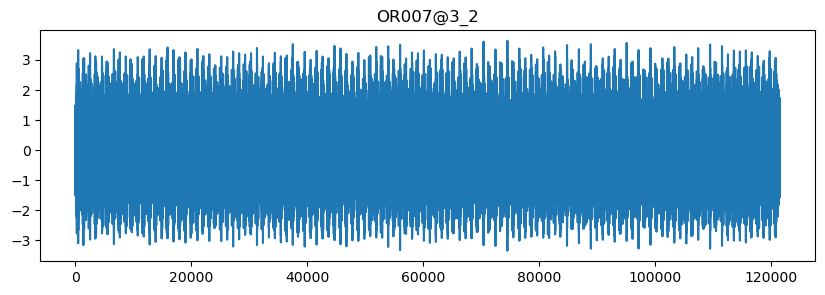

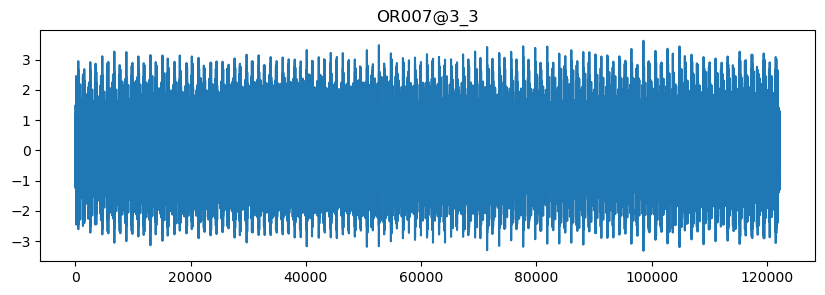

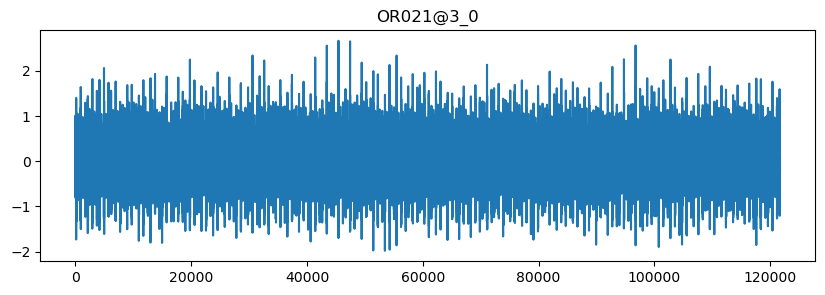

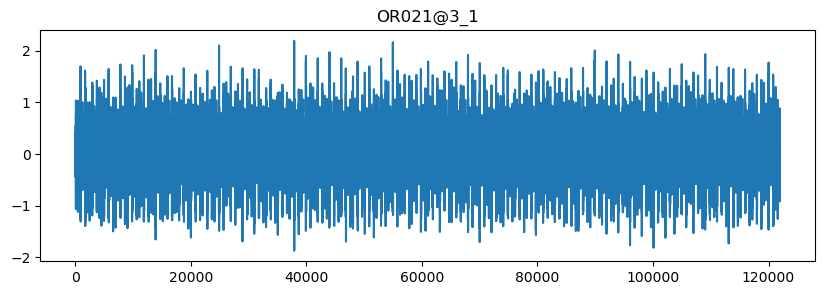

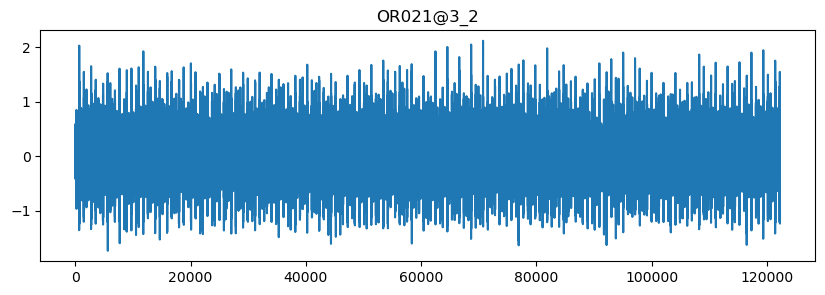

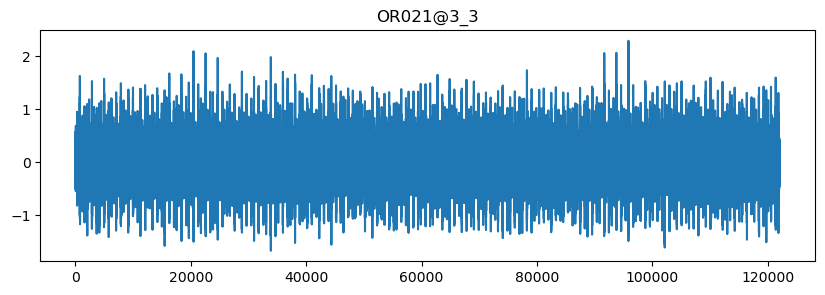

In [50]:
faults = df_12k_drive_outer_race_orthogonal_300['fault'].unique()
for f in faults:
    plt.figure(figsize=(10, 3))
    plt.plot(df_12k_drive_outer_race_orthogonal_300[df_12k_drive_outer_race_orthogonal_300['fault'] == f]['DE_data'])
    plt.title(f)
    plt.show()